<a href="https://colab.research.google.com/github/kylrw/SOCprediction/blob/main/SOCprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
#Import Libraries
import math
import numpy as np
import pandas
from scipy.io import loadmat
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM
from tensorflow.keras import Input
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

In [104]:
# loads matlab files data into a python dict
mat_data = loadmat('TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.mat')

# extracts the first 3 rows (Voltage, Current, Temp) and 100000 columns from the "X" key
x_train = mat_data["X"][:3,:100000] 
# extracts the first 100000 columns from the "Y" (SOC) key
y_train = mat_data["Y"][:1,:100000] 


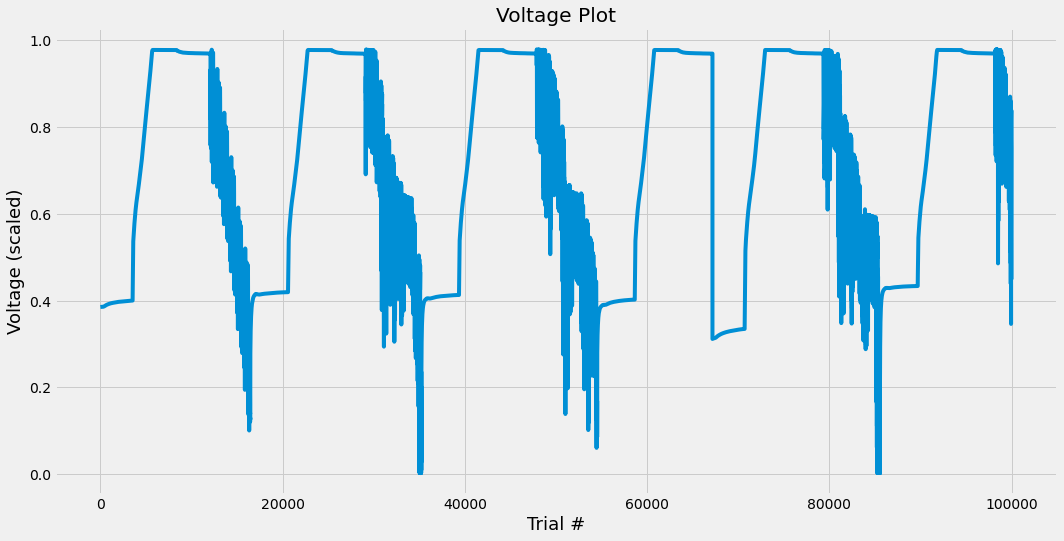

In [105]:
#Voltage Plot
plt.figure(figsize=(16,8))
plt.title('Voltage Plot')
plt.plot(x_train[0])
plt.xlabel('Trial #',fontsize=18)
plt.ylabel('Voltage (scaled)',fontsize=18)
plt.show()

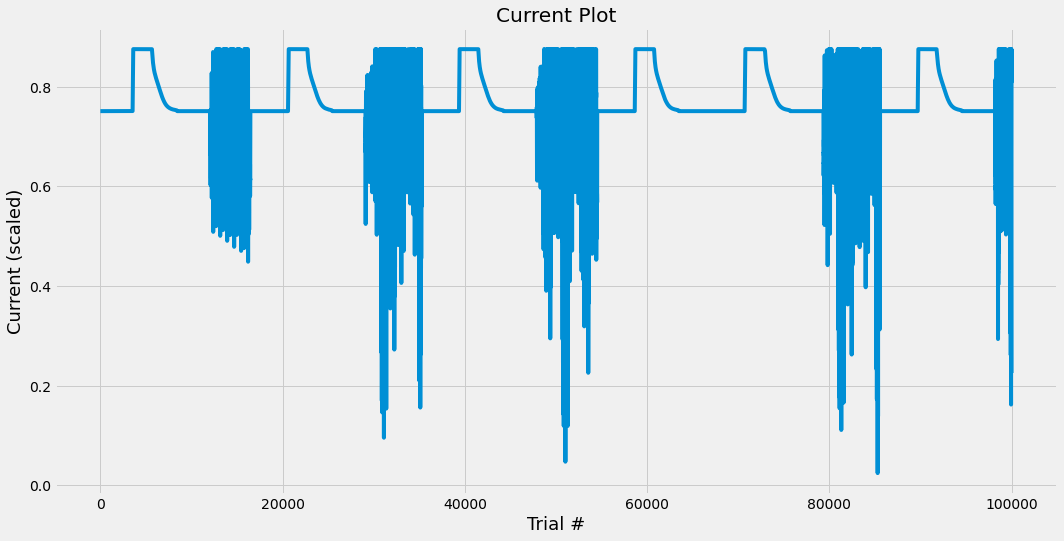

In [106]:
#Current Plot
plt.figure(figsize=(16,8))
plt.title('Current Plot')
plt.plot(x_train[1])
plt.xlabel('Trial #',fontsize=18)
plt.ylabel('Current (scaled)',fontsize=18)
plt.show()

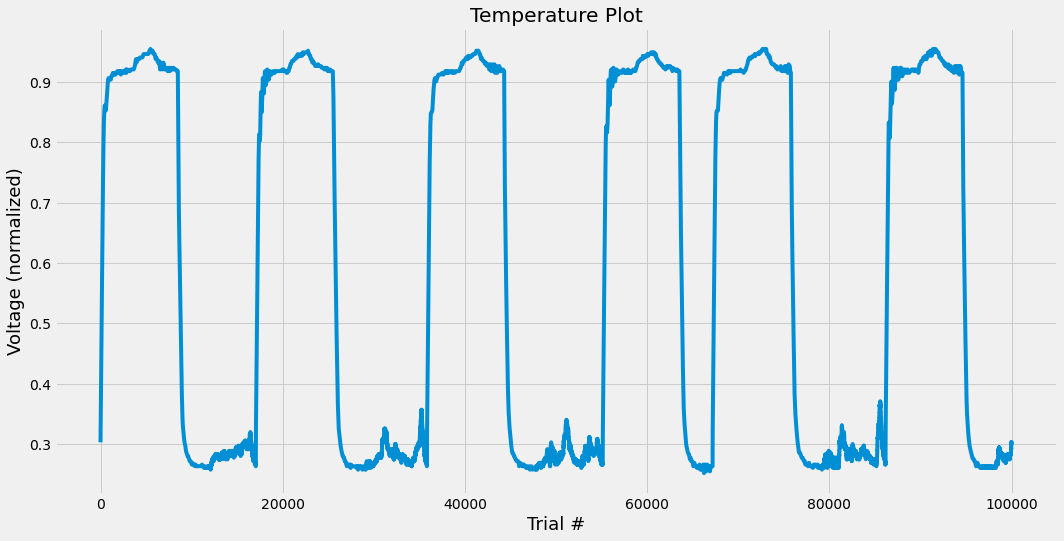

In [19]:
#Temperature Plot
plt.figure(figsize=(16,8))
plt.title('Temperature Plot')
plt.plot(x_train[2])
plt.xlabel('Trial #',fontsize=18)
plt.ylabel('Voltage (normalized)',fontsize=18)
plt.show()

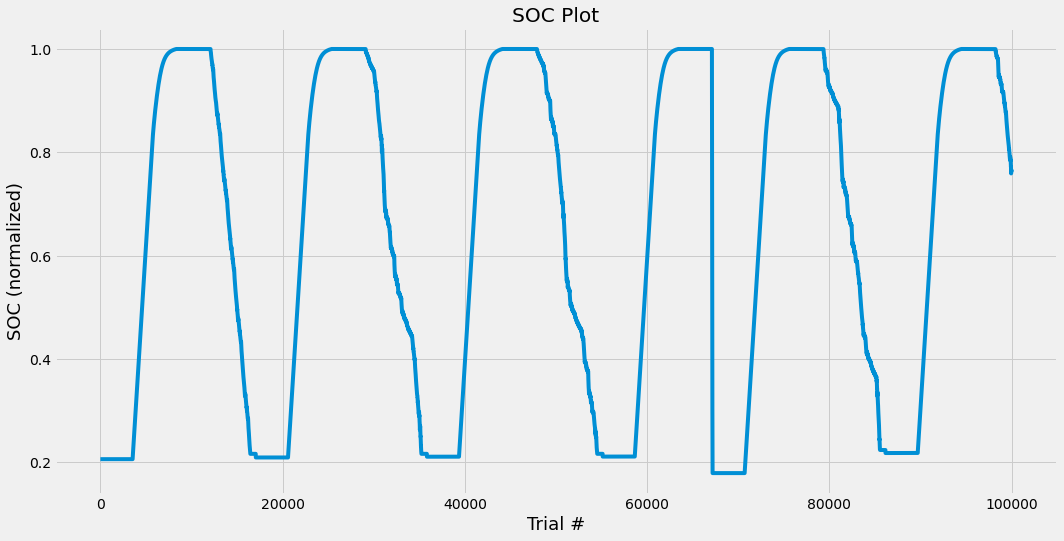

In [22]:
#SOC Plot
plt.figure(figsize=(16,8))
plt.title('SOC Plot')
plt.plot(y_train[0])
plt.xlabel('Trial #',fontsize=18)
plt.ylabel('SOC (normalized)',fontsize=18)
plt.show()

In [107]:
x_train = pandas.DataFrame(x_train)

# flips columns and rows so data is proper shape, have the same # of input features
x_train = x_train.T
y_train = y_train.T

#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [159]:
num_responses = 1

num_features = 3

num_hidden_units = 10

epochs = 1

learn_rate_drop_period = 1000

initial_learn_rate = 0.01

learn_rate_drop_factor = 0.1

training_data_len = 80000


In [160]:
#Build the LSTM model
# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(num_features,), dtype=tf.float32, name="input"),
  tf.keras.layers.BatchNormalization(center=True, scale=False, name="normalization"),
  tf.keras.layers.Dense(num_hidden_units, activation=None, name="fc1"),
  tf.keras.layers.Activation("tanh", name="tanh"),
  tf.keras.layers.Dense(num_hidden_units, activation=None, name="fc2"),
  tf.keras.layers.LeakyReLU(alpha=0.3, name="leaky_relu"),
  tf.keras.layers.Dense(num_responses, activation=None, name="fc3"),
  tf.keras.layers.ReLU(max_value=1, name="clipped_relu"),
  tf.keras.layers.Dense(1, activation=None, name="output")
])

In [162]:
# Compile the model
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learn_rate),
  loss=tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [171]:
# Train the model
model.fit(
  x_train, y_train,
  epochs=epochs,
  batch_size=10000,
  validation_data=(x_train, y_train),
)

10/10 [==============================] - 0s 25ms/step - loss: 5.4102e-04 - mean_absolute_error: 0.0126 - val_loss: 5.2501e-04 - val_mean_absolute_error: 0.0127


In [172]:
x_test = x_train[training_data_len:, :]
y_test = y_train[training_data_len:, :]

y_pred = model.predict(x_test)

625/625 [==============================] - 1s 2ms/step


In [173]:
#Get the root mean squared error (RMSE)

rmse = np.sqrt( np.mean( y_pred - y_test )**2 )
rmse

0.0038581485626037093

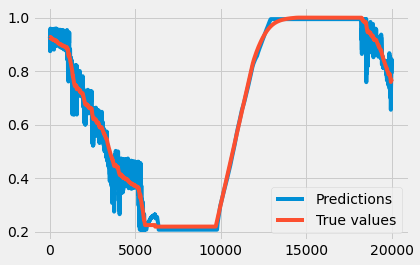

In [174]:
# Plot the predictions
plt.plot(y_pred, label="Predictions")

# Plot the true values
plt.plot(y_test, label="True values")

# Add a legend
plt.legend()

# Show the plot
plt.show()